<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Emilio Andrade &bull; 12/07/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [19]:
# --- Paquetes necesarios para el Taller ---

# 1. Manejo de Datos y Cálculos
import pandas as pd
import numpy as np
import io  # Para manejar la carga de archivos locales

# 2. Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Herramientas de Google Colab (Carga de archivos)
from google.colab import files

# 4. Preprocesamiento y Reducción de Dimensionalidad
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 5. Modelado (Regresión y Clustering) y Selección de Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# 6. Métricas de Evaluación
from sklearn.metrics import r2_score, mean_absolute_error  # Para Regresión
from sklearn.metrics import classification_report, confusion_matrix  # Para Clasificación
from sklearn.metrics import precision_score, recall_score, f1_score  # Métricas específicas

# Configuración de estilo visual
sns.set(style="whitegrid")
%matplotlib inline

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [20]:


# Definimos los nombres de las columnas (según housing.names)
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
    'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Widget para subir el archivo.
uploaded = files.upload()

# Leemos el archivo cargado
#
filename = next(iter(uploaded))

df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=r'\s+', names=column_names)

# --- RESPUESTAS AL EJERCICIO ---

# A. Dimensiones y Atributos
print(f"\nArchivo cargado: {filename}")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de atributos: {df.shape[1]}")
print("Nombres de atributos:", df.columns.tolist())

# B. Número de filas
print(f"Número de filas (muestras): {df.shape[0]}")

# C. Verificación de "missing values"
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Verificación rápida total
print(f"\n¿Existen valores nulos en el dataset?: {df.isnull().values.any()}")

# Visualización inicial (sin la 'a' extra)
df.head()

Saving housing.data.txt to housing.data (2).txt

Archivo cargado: housing.data (2).txt
Dimensiones del dataset: (506, 14)
Número de atributos: 14
Nombres de atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Número de filas (muestras): 506

Conteo de valores nulos por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

¿Existen valores nulos en el dataset?: False


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de la variable CHAS:
 CHAS
0    471
1     35
Name: count, dtype: int64


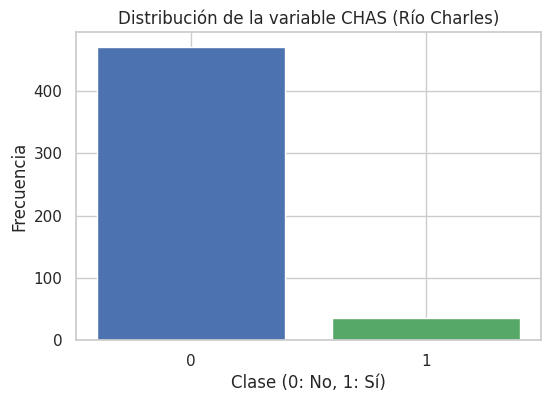


Estadísticos descriptivos de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


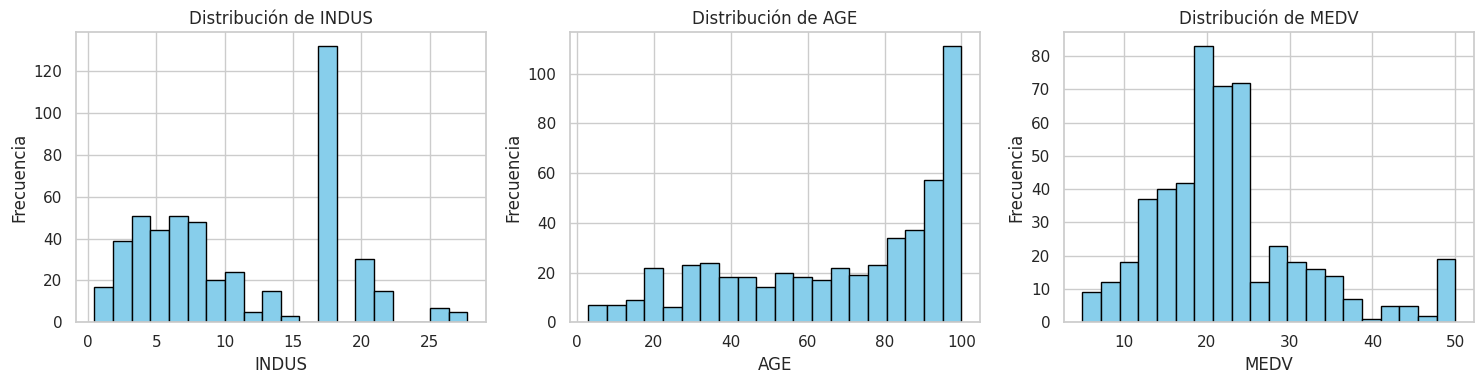

In [21]:
# --- 1. Variables Categóricas (CHAS) ---

# Calculamos la frecuencia de cada clase en la variable CHAS (0 = No río, 1 = Río)
frecuencia_chas = df['CHAS'].value_counts()
print("Frecuencia de la variable CHAS:\n", frecuencia_chas)

# Gráfico de barras para visualizar la proporción
plt.figure(figsize=(6, 4))
plt.bar(frecuencia_chas.index.astype(str), frecuencia_chas.values, color=['#4c72b0', '#55a868'])
plt.title("Distribución de la variable CHAS (Río Charles)")
plt.xlabel("Clase (0: No, 1: Sí)")
plt.ylabel("Frecuencia")
plt.show()

# --- 2. Variables Numéricas ---

# Estadísticos descriptivos básicos (media, desviación, min, max, cuartiles)
# Transponemos (.T) para facilitar la lectura de tantas variables
print("\nEstadísticos descriptivos de variables numéricas:")
display(df.describe().T)

# Histogramas para INDUS, AGE y MEDV
variables_hist = ['INDUS', 'AGE', 'MEDV']

plt.figure(figsize=(15, 4))

for i, col in enumerate(variables_hist):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**1. Variables Categóricas (CHAS):**
Se observa un desbalance significativo en la variable `CHAS`. De las 506 zonas, 471 (aprox. 93%) no limitan con el río (valor 0), mientras que solo 35 sí lo hacen (valor 1). Esto es importante porque al usar esta variable para clasificación, el modelo podría sesgarse hacia la clase mayoritaria (0) si no se trata este desequilibrio.

**2. Variables Numéricas:**
* **Variable Objetivo (MEDV):** El precio medio de las viviendas es de 22.5k, con una desviación estándar de 9.2k, lo que indica una variabilidad considerable en los precios. El rango va desde 5k hasta 50k.
* **Criminalidad (CRIM):** Hay una posible presencia fuerte de *outliers* o una distribución muy sesgada. El promedio es bajo (3.61), pero el valor máximo es extremadamente alto (88.97), y el 75% de los datos está por debajo de 3.67.
* **Antigüedad (AGE):** Boston parece tener zonas con construcciones muy antiguas; la media de proporción de casas construidas antes de 1940 es del 68.5%, y más de la mitad de las zonas (mediana) superan el 77.5%.
* **Zonificación (ZN):** Al menos el 50% de las observaciones tienen un valor de 0 en esta variable, lo que sugiere que muchas zonas no tienen terreno residencial para lotes grandes.

</div>

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

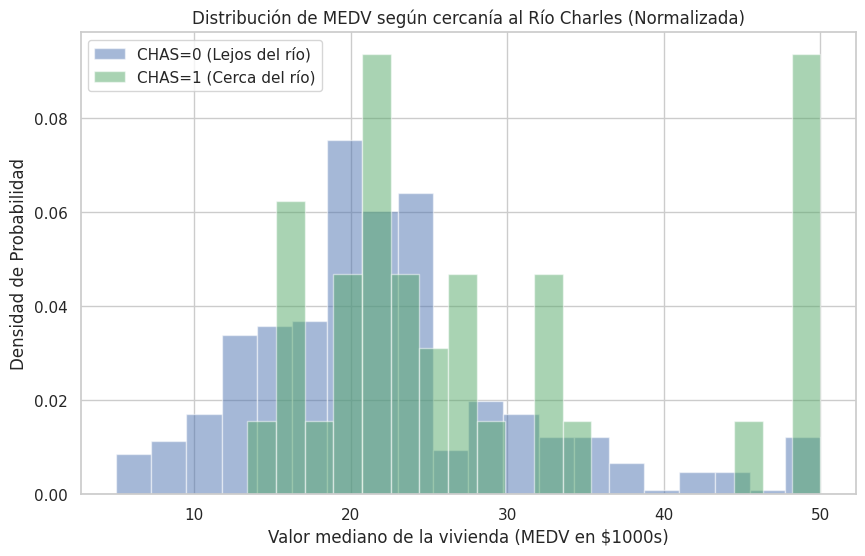

In [22]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Filtramos los valores de MEDV según el valor de CHAS
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']

# Generamos los histogramas superpuestos
# Usamos 'density=True' para normalizar y comparar distribuciones, no cantidades absolutas.
# 'alpha' nos da la transparencia para ver la superposición.
plt.hist(medv_chas_0, bins=20, alpha=0.5, color='#4c72b0', label='CHAS=0 (Lejos del río)', density=True)
plt.hist(medv_chas_1, bins=20, alpha=0.5, color='#55a868', label='CHAS=1 (Cerca del río)', density=True)

# Añadimos etiquetas y leyenda
plt.title('Distribución de MEDV según cercanía al Río Charles (Normalizada)')
plt.xlabel('Valor mediano de la vivienda (MEDV en $1000s)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

Sí, parece que el atributo <strong>CHAS</strong> tiene influencia en el precio, aunque no sea determinante por sí solo.

Al observar los histogramas de densidad superpuestos, se nota que la distribución de las casas que limitan con el río (CHAS=1) está ligeramente <strong>desplazada hacia la derecha</strong> en comparación con las que no limitan (CHAS=0). Esto indica que las propiedades cerca del río tienden a tener valores medios (MEDV) más altos.

<strong>¿Por qué?</strong>
Probablemente se deba al valor añadido de la ubicación y las vistas (amenities), lo que suele encarecer las propiedades. Sin embargo, dado que las curvas se solapan bastante, `CHAS` por sí sola no explica todo el precio, pero sí actúa como un indicador positivo.
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [23]:
# Calculamos la matriz de correlación completa del dataset
correlation_matrix = df.corr()

# Extraemos solo la columna de 'MEDV' y la ordenamos de mayor a menor
# para identificar fácilmente las relaciones más fuertes.
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)

print("Correlación de cada atributo con MEDV:")
print(medv_correlations)

Correlación de cada atributo con MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


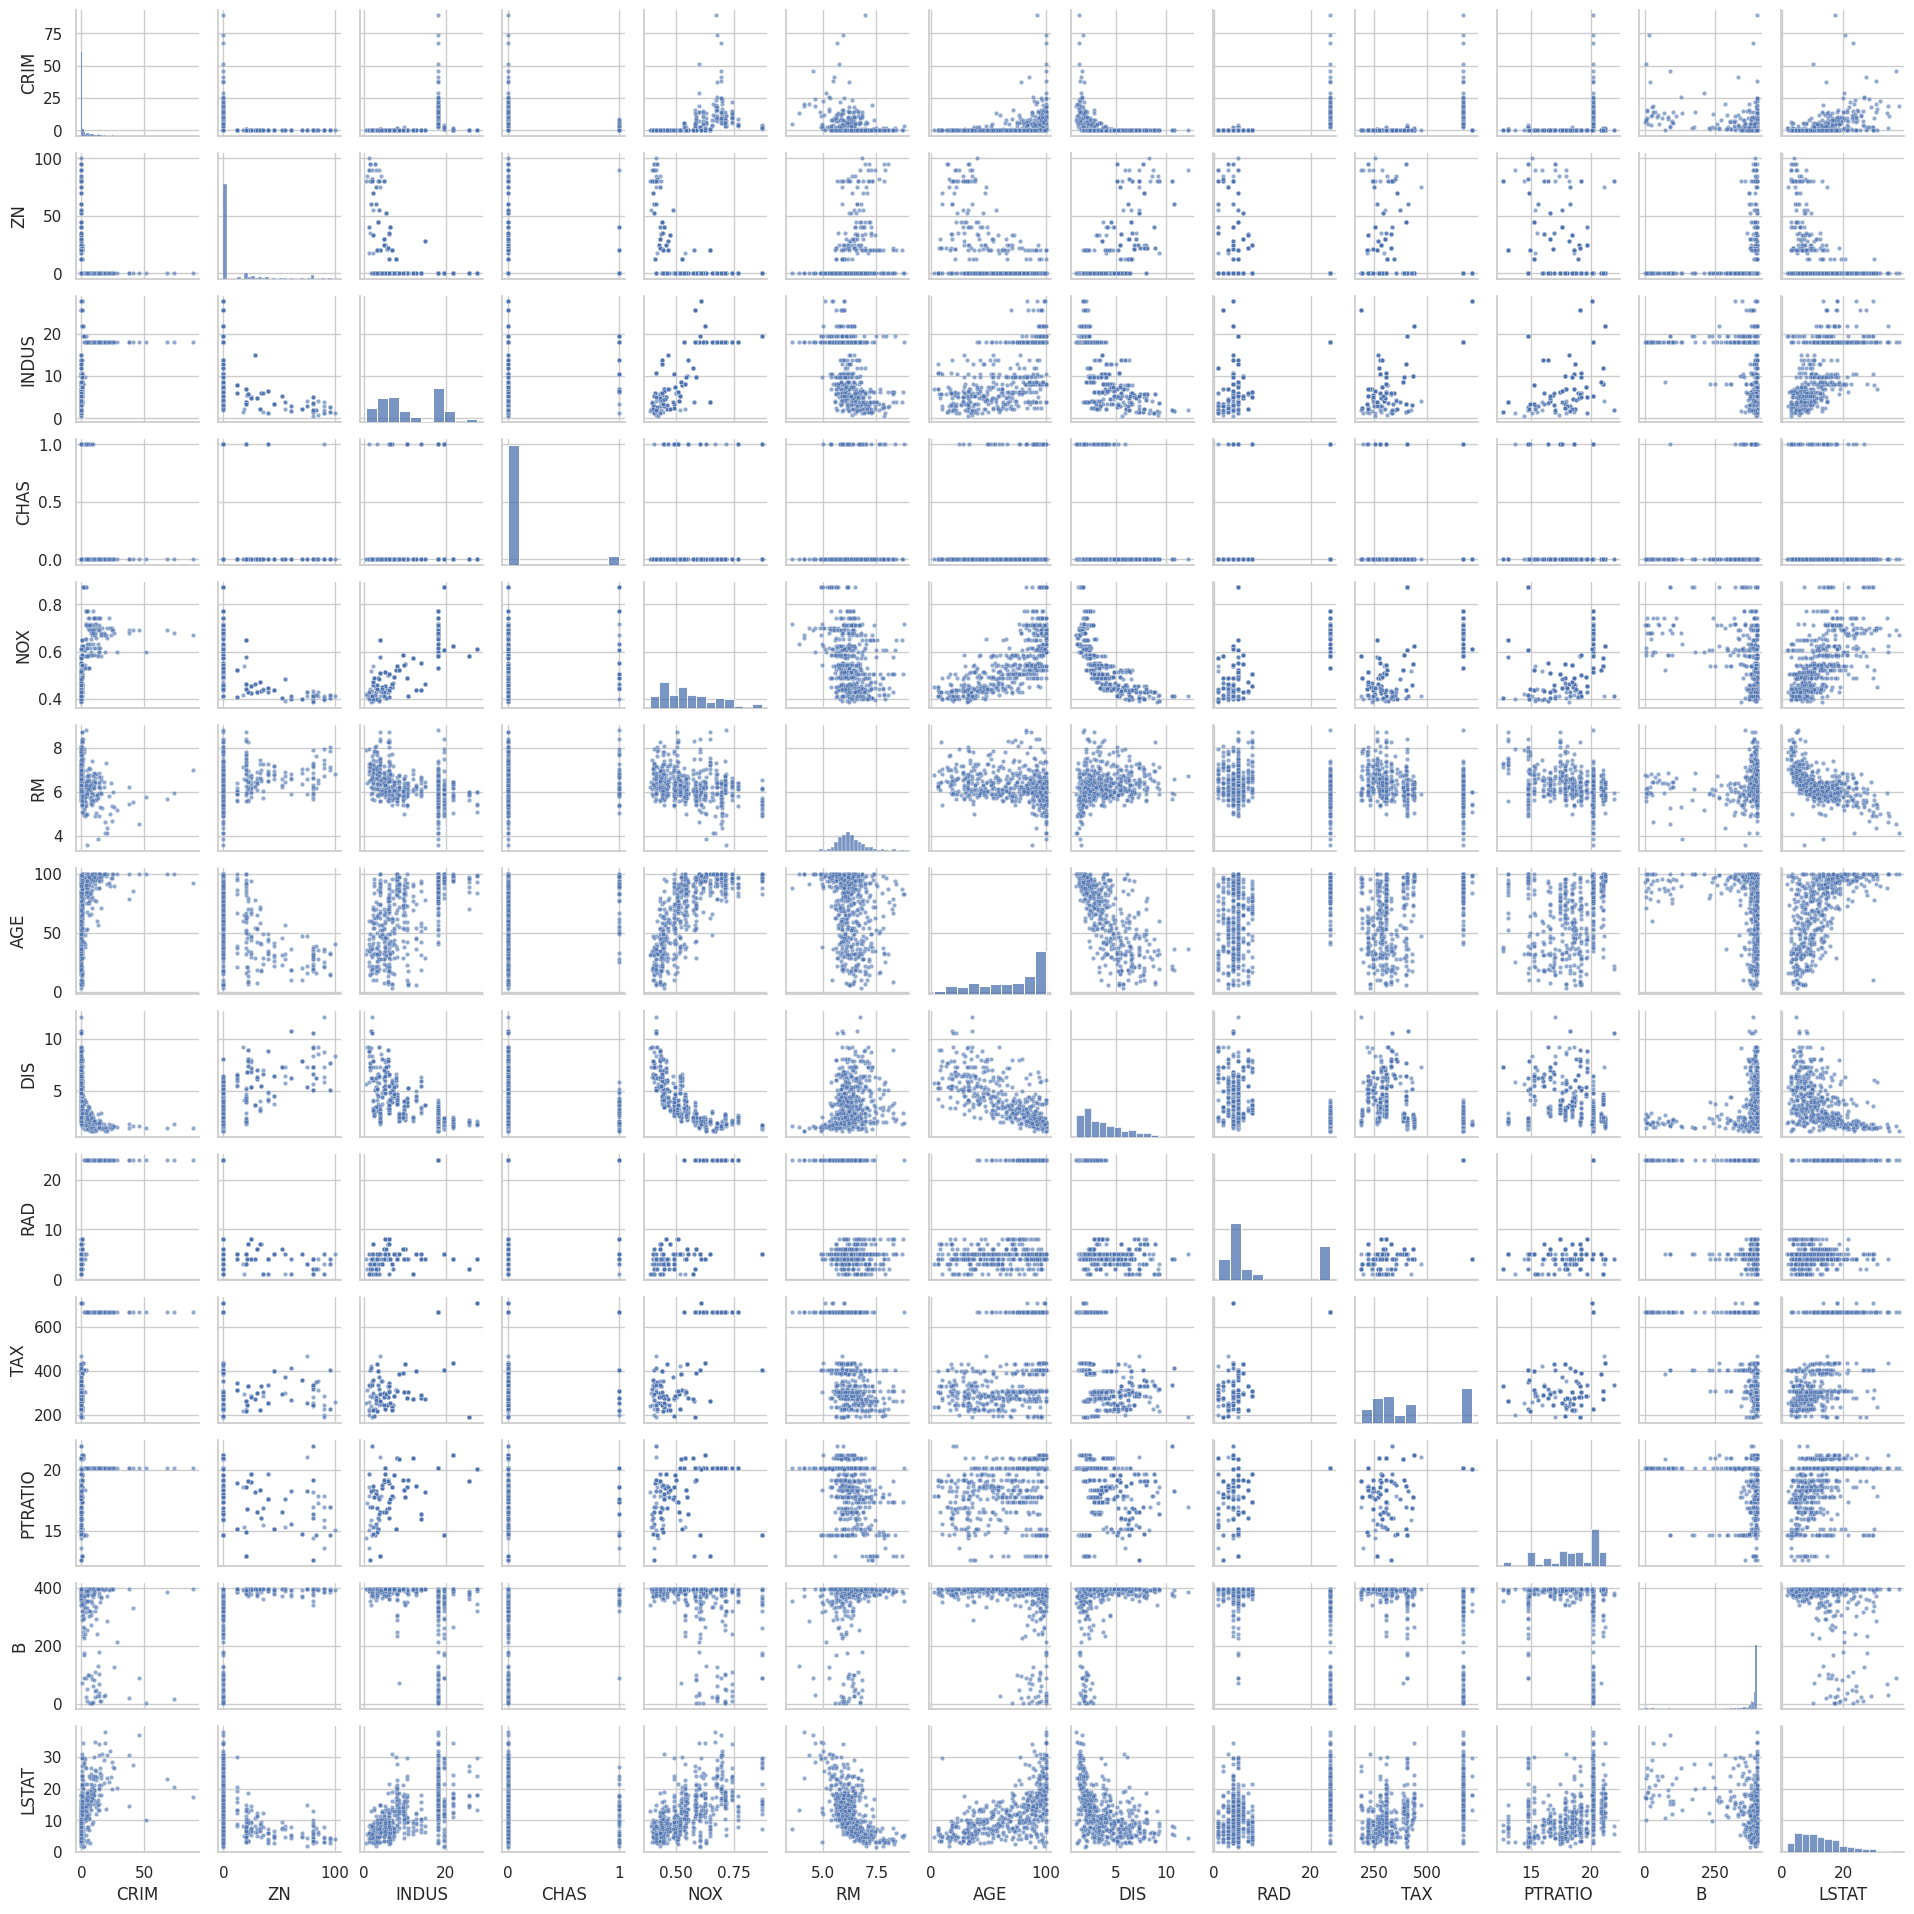

In [24]:
# Creamos un subset sin la variable objetivo 'MEDV'
# El objetivo es ver correlaciones SOLO entre las variables explicativas (predictoras)
df_predictors = df.drop(columns=['MEDV'])

# Generamos el pairplot
# height=1.5 hace los gráficos más pequeños para que la matriz de 13x13 quepa en la pantalla
# plot_kws={'s': 10} reduce el tamaño de los puntos para evitar manchas negras densas
sns.pairplot(df_predictors, height=1.5, plot_kws={'s': 10, 'alpha': 0.6})
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


Atributos con correlación más FUERTE: ['LSTAT', 'RM']
Atributos con correlación más DÉBIL: ['DIS', 'CHAS']


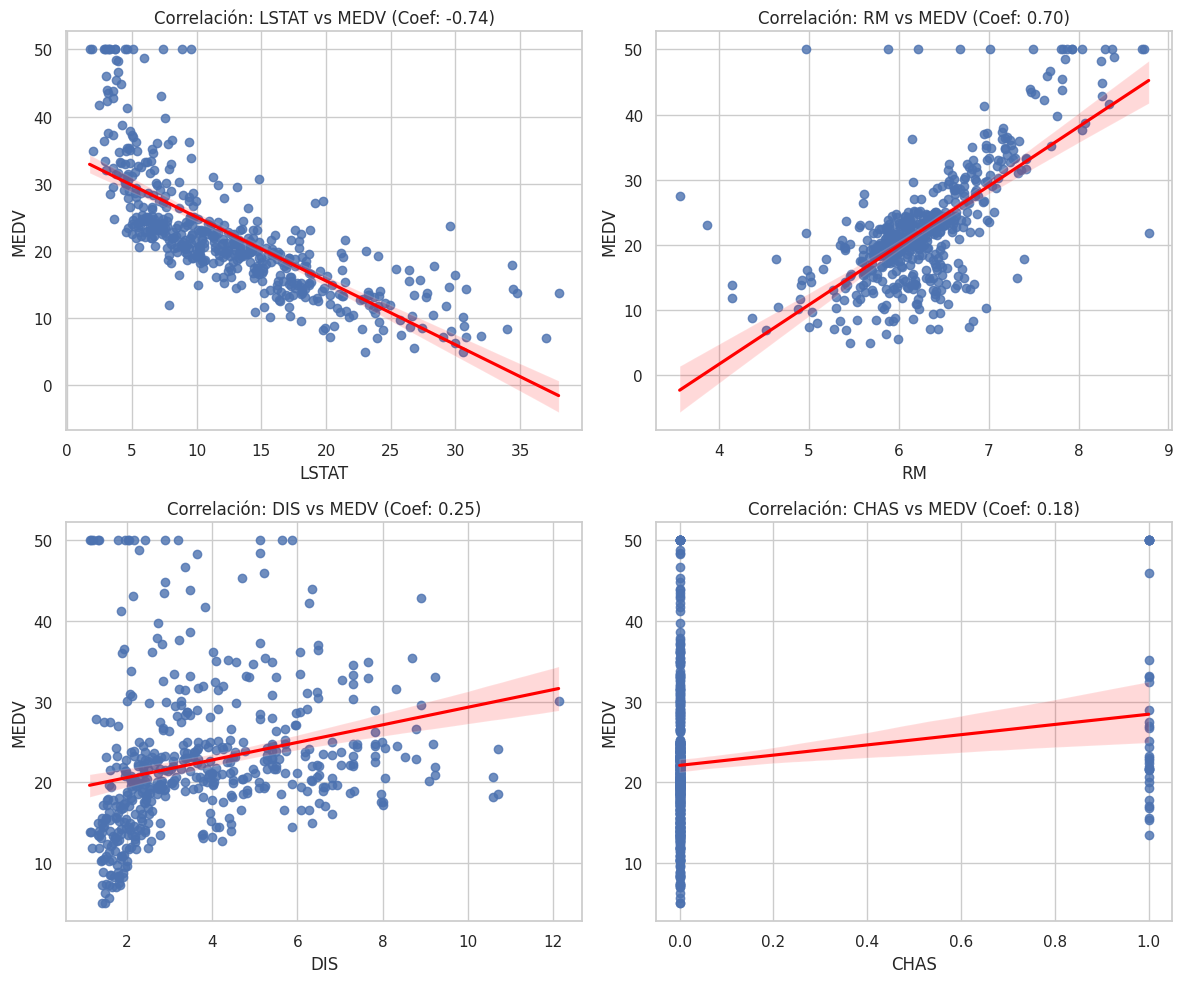

In [25]:
# 1. Calculamos las correlaciones con MEDV
correlaciones = df.corr()['MEDV'].drop('MEDV') # Excluimos MEDV consigo misma

# 2. Ordenamos por valor absoluto para ver la "fuerza" de la relación
# (Una correlación de -0.7 es más fuerte que una de 0.1)
top_correlaciones = correlaciones.abs().sort_values(ascending=False)

# Identificamos los atributos
top_2_strongest = top_correlaciones.head(2).index.tolist()
top_2_weakest = top_correlaciones.tail(2).index.tolist()

attrs_to_plot = top_2_strongest + top_2_weakest

print(f"Atributos con correlación más FUERTE: {top_2_strongest}")
print(f"Atributos con correlación más DÉBIL: {top_2_weakest}")

# 3. Graficamos
plt.figure(figsize=(12, 10))

for i, col in enumerate(attrs_to_plot):
    plt.subplot(2, 2, i+1)
    # regplot dibuja el scatter y la línea de regresión automáticamente
    sns.regplot(x=df[col], y=df['MEDV'], line_kws={"color": "red"})
    plt.title(f'Correlación: {col} vs MEDV (Coef: {correlaciones[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

Los gráficos confirman visualmente los coeficientes de correlación calculados:

* **Correlaciones Fuertes:**
    * **LSTAT vs MEDV:** Se observa claramente una **pendiente negativa pronunciada**. A medida que aumenta el porcentaje de población de bajo estatus (`LSTAT`), el valor de la vivienda cae drásticamente, lo cual coincide con su fuerte correlación negativa (-0.74).
    * **RM vs MEDV:** Muestra una clara **tendencia lineal positiva**. A más habitaciones (`RM`), mayor es el precio, respaldando su alta correlación positiva (+0.70).

* **Correlaciones Débiles:**
    * **DIS y CHAS vs MEDV:** En estos gráficos, la nube de puntos es mucho más dispersa y la línea de regresión es casi plana o con una pendiente muy suave, lo que visualmente demuestra su baja capacidad para explicar por sí solas la variación en el precio (`MEDV`).
</div>

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


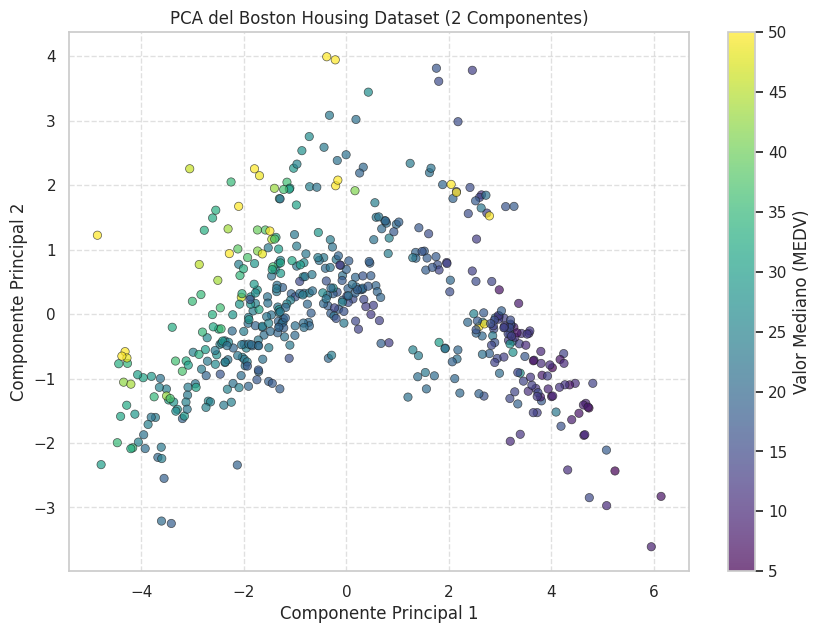

Varianza explicada por los 2 componentes: 58.15%


In [26]:


# 1. Separamos las Features (X) del Target (y)
# Es vital quitar 'MEDV' porque es lo que queremos explicar, no parte de la reducción.
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# 2. Estandarización de los datos (Paso CRÍTICO para PCA)
# PCA busca maximizar varianza. Si no escalamos, las variables con magnitudes grandes (TAX, B)
# dominarán los componentes principales injustamente.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicamos PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Visualización
plt.figure(figsize=(10, 7))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(sc, label='Valor Mediano (MEDV)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Boston Housing Dataset (2 Componentes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Extra: Varianza explicada para saber cuánta información retuvimos
print(f"Varianza explicada por los 2 componentes: {pca.explained_variance_ratio_.sum()*100:.2f}%")

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


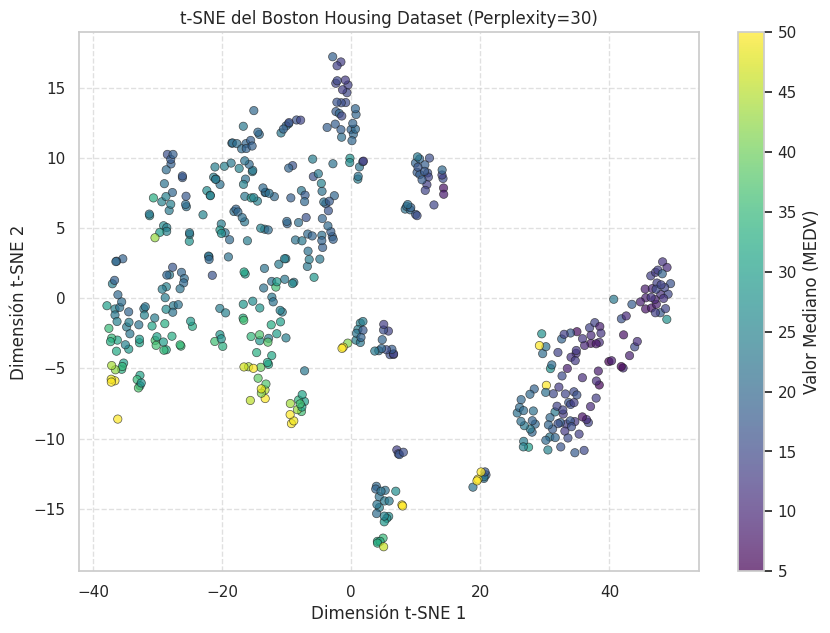

In [27]:


# Configuración del modelo t-SNE
# 'perplexity' controla el equilibrio entre la estructura local y global.
# 'random_state' es vital para reproducibilidad porque t-SNE inicia aleatoriamente.
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)

# Aplicamos t-SNE a los datos escalados (X_scaled) que creamos en el bloque anterior
X_tsne = tsne.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(10, 7))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(sc, label='Valor Mediano (MEDV)')
plt.title('t-SNE del Boston Housing Dataset (Perplexity=30)')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**1. Calidad de la Reducción:**
La reducción con PCA conserva el **58.15%** de la varianza original. Aunque simplifica mucho el problema (de 13 dimensiones a 2), estamos perdiendo casi el 42% de la información ("signal"). Esto sugiere que 2 componentes no son suficientes para capturar toda la complejidad lineal del mercado inmobiliario de Boston.

**2. Visualización y Separación (PCA vs t-SNE):**
* **PCA:** Muestra una transición suave (gradiente) de precios. Se observa que las casas caras (amarillas) tienden a estar en un extremo y las baratas (moradas) en otro, pero hay mucho solapamiento en el centro.
* **t-SNE:** Tiende a formar "islotes" o agrupaciones más definidas donde los colores similares están mejor compactados. Logra separar mejor estructuras locales complejas que PCA aplasta.

**3. ¿Cuál usar para predecir? (PCA o t-SNE):**
Para un modelo predictivo, **PCA** suele ser preferible (especialmente si usamos regresión lineal después) porque conserva la estructura global y las distancias son interpretables. t-SNE es excelente para visualizar, pero no conserva distancias ni densidades globales de manera confiable para alimentar un modelo de regresión estándar.

**4. ¿Por qué son tan diferentes?**
PCA es un método lineal que rota los ejes para maximizar la varianza global. t-SNE es no-lineal y probabilístico; se enfoca en mantener a los "vecinos cercanos" juntos, distorsionando las distancias largas para lograrlo. Por eso t-SNE revela subgrupos que PCA no puede "ver".
</div>

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [28]:


# --- 1. División del Dataset Original ---

# Definimos X (predictoras) e y (target)
X = df.drop(columns=['MEDV'])
y = df['MEDV']


ULTIMO_DIGITO_CEDULA = 9

# Dividimos en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=ULTIMO_DIGITO_CEDULA)

print(f"Dimensiones del Train set: {X_train.shape}")
print(f"Dimensiones del Test set: {X_test.shape}")

# --- 2. Modelo de Regresión Lineal ---

model_lr = LinearRegression()

# --- 3. Validación Cruzada (R2 y MAE) ---

# Calculamos R2 (Coeficiente de determinación)
# scoring='r2' es el default para regresión, pero lo especificamos por claridad
r2_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='r2')

# Calculamos MAE (Mean Absolute Error)
# OJO: Sklearn usa 'neg_mean_absolute_error' porque sus algoritmos buscan MAXIMIZAR scores.
# Por eso devuelve valores negativos. Debemos multiplicarlos por -1 para interpretarlos como error real.
mae_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores  # Convertimos a positivo

# --- 4. Resultados ---
print("\n--- Resultados de Validación Cruzada (Original Dataset) ---")
print(f"R2 Promedio: {r2_scores.mean():.4f}  (std: {r2_scores.std():.4f})")
print(f"MAE Promedio: {mae_scores.mean():.4f} (std: {mae_scores.std():.4f})")

Dimensiones del Train set: (404, 13)
Dimensiones del Test set: (102, 13)

--- Resultados de Validación Cruzada (Original Dataset) ---
R2 Promedio: 0.7066  (std: 0.0510)
MAE Promedio: 3.3398 (std: 0.6431)


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [29]:


# --- 1. Preparación de Datos Reducidos (PCA) ---

# Reutilizamos X e y definidos anteriormente
# Estandarizamos de nuevo para asegurar que el flujo es correcto
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA para obtener las 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- 2. División del Dataset Reducido ---

# Usamos el MISMO random_state (tu cédula) para que la comparación sea justa
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=ULTIMO_DIGITO_CEDULA
)

print(f"Dimensiones del Train set (PCA): {X_train_pca.shape}")

# --- 3. Validación Cruzada con el Dataset Reducido ---

model_lr_pca = LinearRegression()

# Calculamos R2
r2_scores_pca = cross_val_score(model_lr_pca, X_train_pca, y_train_pca, cv=5, scoring='r2')

# Calculamos MAE (recordando invertir el signo)
mae_scores_pca = cross_val_score(model_lr_pca, X_train_pca, y_train_pca, cv=5, scoring='neg_mean_absolute_error')
mae_scores_pca = -mae_scores_pca

# --- 4. Resultados ---
print("\n--- Resultados de Validación Cruzada (PCA - 2 Componentes) ---")
print(f"R2 Promedio: {r2_scores_pca.mean():.4f}  (std: {r2_scores_pca.std():.4f})")
print(f"MAE Promedio: {mae_scores_pca.mean():.4f} (std: {mae_scores_pca.std():.4f})")

Dimensiones del Train set (PCA): (404, 2)

--- Resultados de Validación Cruzada (PCA - 2 Componentes) ---
R2 Promedio: 0.4337  (std: 0.1292)
MAE Promedio: 4.8158 (std: 0.8054)


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**1. ¿Con qué datos ha funcionado mejor?**
Indiscutiblemente, el modelo funcionó mejor con el **conjunto de datos original** (todas las variables).
* **R²:** 0.70 (Original) vs 0.43 (PCA).
* **MAE:** 3.34k (Original) vs 4.82k (PCA).

**2. ¿Tiene sentido el resultado?**
Absolutamente. Al reducir de 13 dimensiones a solo 2 con PCA, eliminamos gran parte de la información (ruido, pero también señal valiosa). El modelo de regresión lineal perdió variables explicativas clave (como `LSTAT` o `RM` por separado) y tuvo que conformarse con una versión "comprimida" de la realidad, lo que aumentó su error promedio en casi 1,500 dólares por casa.

**3. Alineación con el Ejercicio 3:**
Sí, está perfectamente alineado. En el ejercicio anterior calculamos que las 2 componentes principales solo explicaban el **58.15% de la varianza**. Al perder casi el 42% de la información del dataset, era esperable que la capacidad predictiva del modelo (R²) cayera drásticamente, como efectivamente sucedió (bajando de ~0.70 a ~0.43).
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


--- Evaluación Final sobre el Conjunto de Test ---
R2 (Test): 0.7660
MAE (Test): 3.3631


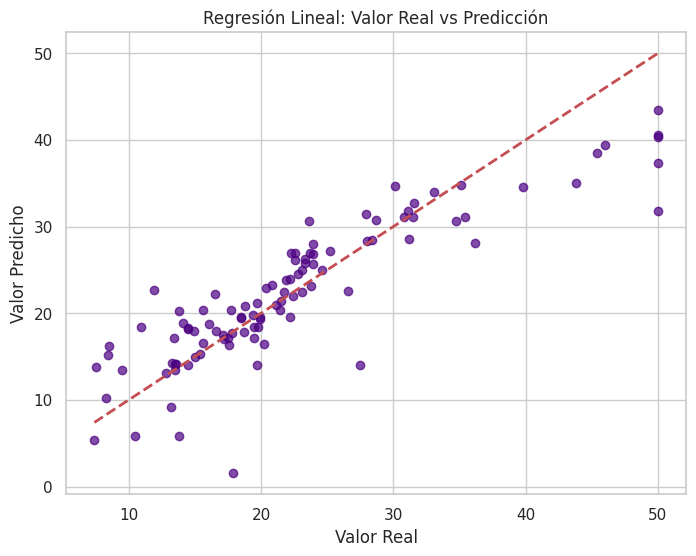

In [30]:


# 1. Entrenamos el modelo ganador (Linear Regression con todos los atributos)
# cross_val_score valida, pero no deja el modelo entrenado, así que hacemos fit explícito aquí.
model_lr.fit(X_train, y_train)

# 2. Generamos predicciones sobre el conjunto de Test (datos que el modelo NUNCA ha visto)
y_pred = model_lr.predict(X_test)

# 3. Calculamos la precisión final
r2_final = r2_score(y_test, y_pred)
mae_final = mean_absolute_error(y_test, y_pred)

print("--- Evaluación Final sobre el Conjunto de Test ---")
print(f"R2 (Test): {r2_final:.4f}")
print(f"MAE (Test): {mae_final:.4f}")

# Extra: Visualización rápida de Predicción vs Realidad
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='indigo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de identidad
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Valor Real vs Predicción')
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**1. Para el Ejecutivo (MAE):**
Utilizaría el **MAE (3.3631)**.
* **¿Por qué?** Es una métrica directa e interpretable en términos de negocio. Le puedo explicar al ejecutivo que, en promedio, nuestras predicciones se equivocan por **$3,363 dólares** hacia arriba o hacia abajo. Es un margen de error tangible en dinero que él puede evaluar si es aceptable o no para tomar decisiones de inversión.

**2. Para el Analista Matemático (R²):**
Utilizaría el **R² (0.7660)**.
* **¿Por qué?** Es una métrica estadística adimensional que describe la "bondad de ajuste". Al analista le interesa saber que nuestro modelo es capaz de explicar el **76.6% de la variabilidad** en los precios de las casas, lo cual es una medida técnica robusta para comparar el rendimiento de este modelo frente a otros o frente a una línea base (el promedio).
</div>

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [31]:


# --- 1. Preparación de los datos para Clasificación ---

# Ahora el target es CHAS (Categórica binaria)
X_cls = df.drop(columns=['CHAS'])
y_cls = df['CHAS']

# --- 2. División train/test ---
# Usamos el mismo random_state para consistencia
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=ULTIMO_DIGITO_CEDULA
)

print(f"Dimensiones Train (Clasificación): {X_train_c.shape}")

# --- 3. Escalado de datos (Fundamental para K-Means) ---
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c) # ¡Solo transform en test!

# --- 4. Definición y Entrenamiento del Modelo K-Means ---

# Definimos 2 clusters (0 y 1) esperando que se alineen con nuestras clases
kmeans = KMeans(n_clusters=2, random_state=ULTIMO_DIGITO_CEDULA, n_init='auto')

# Ajustamos el modelo (Unsupervised, solo usa X)
kmeans.fit(X_train_c_scaled)

# --- 5. Predicción ---
y_pred_c = kmeans.predict(X_test_c_scaled)

# --- 6. Evaluación (Métricas) ---

print("\n--- Métricas de Clasificación (K-Means Original) ---")
# Usamos average='weighted' o 'binary' dependiendo de cómo queramos ver el global.
# Dado el desbalance, miraremos el reporte completo.
print("Precisión Global:", precision_score(y_test_c, y_pred_c, average='weighted', zero_division=0))
print("Sensibilidad (Recall) Global:", recall_score(y_test_c, y_pred_c, average='weighted', zero_division=0))
print("F1-Score Global:", f1_score(y_test_c, y_pred_c, average='weighted', zero_division=0))

print("\nReporte Detallado por Clase:")
print(classification_report(y_test_c, y_pred_c, zero_division=0))

# Matriz de confusión para ver qué cluster asignó a qué
print("Matriz de Confusión:\n", confusion_matrix(y_test_c, y_pred_c))

Dimensiones Train (Clasificación): (404, 13)

--- Métricas de Clasificación (K-Means Original) ---
Precisión Global: 0.8528800293506177
Sensibilidad (Recall) Global: 0.38235294117647056
F1-Score Global: 0.4891155249091166

Reporte Detallado por Clase:
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        94
           1       0.08      0.62      0.14         8

    accuracy                           0.38       102
   macro avg       0.50      0.49      0.33       102
weighted avg       0.85      0.38      0.49       102

Matriz de Confusión:
 [[34 60]
 [ 3  5]]


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [32]:
# --- 1. Preparación y Reducción de Dimensionalidad ---

# Definimos las predictoras quitando la variable objetivo 'CHAS'
X_cls = df.drop(columns=['CHAS'])
y_cls = df['CHAS']

# Estandarizamos (Obligatorio para PCA y K-Means)
scaler_c = StandardScaler()
X_cls_scaled = scaler_c.fit_transform(X_cls)

# Aplicamos PCA para reducir a 2 dimensiones
pca_cls = PCA(n_components=2)
X_cls_pca = pca_cls.fit_transform(X_cls_scaled)

# --- 2. División train/test ---
X_train_c_pca, X_test_c_pca, y_train_c_pca, y_test_c_pca = train_test_split(
    X_cls_pca, y_cls, test_size=0.2, random_state=ULTIMO_DIGITO_CEDULA
)

print(f"Dimensiones Train (PCA - Clasificación): {X_train_c_pca.shape}")

# --- 3. Modelo K-Means ---
# Configuramos n_clusters=2 para intentar separar "Río" vs "No Río"
kmeans_pca = KMeans(n_clusters=2, random_state=ULTIMO_DIGITO_CEDULA, n_init='auto')

# Entrenamos con los datos reducidos
kmeans_pca.fit(X_train_c_pca)

# --- 4. Predicción y Evaluación ---
y_pred_c_pca = kmeans_pca.predict(X_test_c_pca)

print("\n--- Métricas de Clasificación (K-Means con PCA) ---")
print(classification_report(y_test_c_pca, y_pred_c_pca, zero_division=0))
print("Matriz de Confusión:\n", confusion_matrix(y_test_c_pca, y_pred_c_pca))

Dimensiones Train (PCA - Clasificación): (404, 2)

--- Métricas de Clasificación (K-Means con PCA) ---
              precision    recall  f1-score   support

           0       0.93      0.43      0.58        94
           1       0.08      0.62      0.15         8

    accuracy                           0.44       102
   macro avg       0.51      0.53      0.37       102
weighted avg       0.86      0.44      0.55       102

Matriz de Confusión:
 [[40 54]
 [ 3  5]]


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**1. Selección de Métricas por Audiencia:**
* **Para el Ejecutivo (Precisión):** Usaría la **Precisión (Global Ponderada ~0.85)**.
    * *Por qué:* Al ejecutivo le interesa la "confianza" o el riesgo de error. Le diría: *"Cuando el modelo afirma que una casa pertenece a la categoría mayoritaria, tiene un 85% de probabilidad de estar en lo correcto"*. Es una métrica de negocio directa sobre la fiabilidad de una predicción positiva.
* **Para el Analista Matemático (F1-Score):** Usaría el **F1-Score (~0.49/0.55)**.
    * *Por qué:* Esta métrica combina precisión y sensibilidad en un solo número. Al ser un dataset desbalanceado (muchas casas lejos del río, pocas cerca), la precisión por sí sola engaña. El F1-Score castiga al modelo por su pésimo desempeño detectando la clase minoritaria (el río), dándole al analista una visión realista y técnica de que el modelo en realidad no está funcionando bien estructuralmente.

**2. ¿Mejor discriminando o acertando?**
Observando las métricas globales (Precisión 0.85 vs Sensibilidad/Recall 0.38), el modelo es **mejor "acertando"** (Precisión) que discriminando.

* **¿Cómo se interpreta?**
    * **"Acertando" (Precisión Alta):** Significa que el modelo es conservador o selectivo. Cuando se "atreve" a etiquetar una casa (especialmente en el cluster 0), suele tener razón. No dispara al aire.
    * **"Discriminando" (Sensibilidad Baja):** Significa que el modelo falla en *encontrar* o separar a todos los individuos de una clase. La matriz de confusión muestra que mezcla masivamente las clases (deja 60 casas de la clase 0 mal clasificadas). No tiene la capacidad de distinguir ("discriminar") claramente los grupos, pero mantiene alta pureza en lo poco que filtra.

*Nota:* El bajo rendimiento general (Accuracy < 50%) y la confusión sugieren que K-Means (un algoritmo geométrico) no logra mapear correctamente la lógica binaria del río, o que los clusters encontrados no se corresponden naturalmente con la variable `CHAS`.
</div>